# MNIST

In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
# print(os.listdir('../input'))
print(os.listdir('./'))

['test.csv', 'MNIST_results.csv', 'YT_MNIST_Keras.ipynb', 'YT_MNIST.ipynb', 'train.csv', '.ipynb_checkpoints', 'sample_submission.csv']


## Load data into Pandas dataframe

* 一張圖片是 28 pixel x 28 pixel = 784 pixel^2
* 第 x 個 pixel 是位在 i 列 j 行

  $ x = i \times 28 + j$, where $0 \le i, j \le 27$
 

* 第 1 欄是圖片上的手寫數字是多少 (label)
* 第 2 欄到最後一欄 (第 785 欄) 是每個像素上的灰階程度 (0-255)

In [163]:
df_labeled = pd.read_csv('train.csv')
df_labeled.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Inspect data

In [164]:
df_labeled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


總共有 42000 列 785 行，沒有缺值

In [165]:
# Summary statistics
df_labeled.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


統計資訊似乎對這個 MNIST 資料及沒有意義

## Show images

先定義一個函數來顯示圖片

In [166]:
def view_image(row_index):
    # convert the pd.Series into np.array
    img = df_labeled.iloc[row_index].values
    # reshape into 28 x 28
    img_sq = np.reshape(img[1:], (28, 28)) # 注意要用 img[1:] 因為第一個欄位是 label
    # show image
    plt.imshow(img_sq, cmap=plt.cm.gray)
    plt.title(img[0])

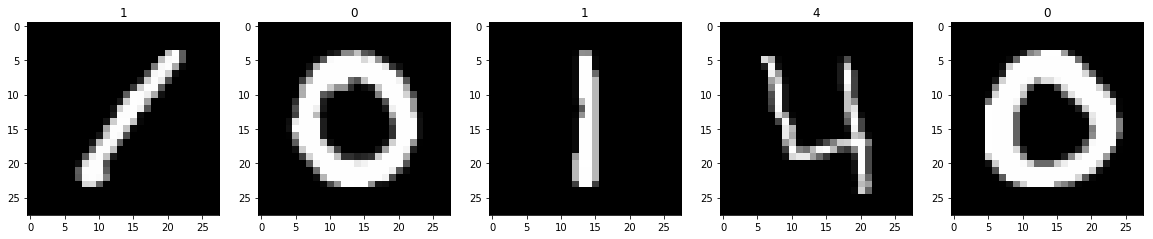

In [167]:
plt.figure(figsize=(20, 5))
for i in range(0, 5):
    plt.subplot(1, 5, i+1)
    view_image(i)

## Train and test split

* 先用 5000 筆資料去跑，用小一點的數據跑測試，跑比較快

In [168]:
from sklearn.model_selection import train_test_split

# 雖然用 pd.Series 也可以，不過看大部分人都用 np.array 型態，所以就轉成 np.array
images = df_labeled.iloc[:5000, 1:].values
labels = df_labeled.iloc[:5000, 0].values

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

## Build models

* 參考 [Scikit-learn API reference](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.naive_bayes)
* 可以用的 metric: [https://scikit-learn.org/stable/modules/classes.html#classification-metrics](https://scikit-learn.org/stable/modules/classes.html#classification-metrics)

#### MNIST 是把圖片分類成 0 ~ 9 共 10 個不同的類別，所以是 multi-class
但是 metrics 不支援 multi-class，所以 `model_performance_metrics()` 就沒用了

#### 先定義一個函數來看 model performance

In [169]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

def model_performance_metrics(y_train, y_train_prob, y_test, y_test_prob):
    metric_names = ['AUC', 'Accuracy', 'Precision', 'Recall', 'f1-score']
    
    metric_values_training = [roc_auc_score(y_train, y_train_prob),
                              accuracy_score(y_train, y_train_prob),
                              precision_score(y_train, y_train_prob),
                              recall_score(y_train, y_train_prob),
                              f1_score(y_train, y_train_prob)]
    
    metric_values_testing = [roc_auc_score(y_test, y_test_prob),
                             accuracy_score(y_test, y_test_prob),
                             precision_score(y_test, y_test_prob),
                             recall_score(y_test, y_test_prob),
                             f1_score(y_test, y_test_prob)]
    
    all_metrics = pd.DataFrame({'metrics': metric_names,
                                'train': metric_values_training,
                                'test': metric_values_testing},
                                columns=['metrics', 'train', 'test'])

    all_metrics.set_index('metrics')
#     print(all_metrics)
    all_metrics.head(5)

定義另外一個函數把 model performance 畫出來

In [170]:
from sklearn.metrics import auc, roc_curve

def plot_roc_curve(train, train_prob, test, test_prob):
    fpr_train, tpr_train, _ = roc_curve(train, train_prob)
    fpr_test, tpr_test, _ = roc_curve(test, test_prob)
    
    label_train = 'ROC train (AUC = %0.4f)' % auc(fpr_train, tpr_train)
    label_test = 'ROC test (AUC = %0.4f)' % auc(fpr_test, tpr_test)
    
    plt.figure()
    plt.plot(fpr_train, tpr_train, color='green', linewidth=2, label=label_train)
    plt.plot(fpr_test, tpr_test, color='red', linewidth=2, label=label_test)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc='lower right')
    plt.show()

### SVM model

#### Non-linear SVM

In [171]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

看看分數，來看模型預測的結果如何？

SVM 的分數是 mean accuracy

In [172]:
svc.score(X_test, y_test)

0.117

分數太低了，表示預測的結果很差，要換別的模型試試看

#### linear SVM

In [173]:
from sklearn.svm import LinearSVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)


/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [174]:
linear_svc.score(X_test, y_test)

0.831

結果 linear SVM 比 non-linear SVM 分數還要高

### Logistic regression model

In [175]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

看看用 logistic regression 的分數有沒有高一些

In [176]:
lr.score(X_test, y_test)

0.795

和 SVM 比起來 logistic regression 的結果改善不少，從 SVM 的 11.7% 上升到了 logistic regression 的 79.5%

In [177]:
y_pred_train = lr.predict(X_train) # 4000 row 的 vector
y_prob_train = lr.predict_proba(X_train) # 有 10 個欄位，表示分別為 0 ~ 9 的機率

y_pred_test = lr.predict(X_test)
y_prob_test = lr.predict_proba(X_test) # 有 10 個欄位，表示分別為 0 ~ 9 的機率

In [178]:
print(y_pred_train.shape)
print(y_prob_train.shape)

(4000,)
(4000, 10)


因為 dimension 不一樣，要對 y_pred_train 做 reshape 使它變成 4000 x 10 才能算各種分數

對 y_pred_train 做 one-hot encoding

In [179]:
def array_one_hot(input_array, shape):
    size = input_array.size
    output_array = np.zeros(shape)
    output_array[np.arange(size), input_array] = 1
    return output_array

In [180]:
y_pred_train_one_hot = array_one_hot(y_pred_train, y_prob_train.shape)
y_pred_train_one_hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [181]:
y_pred_test_one_hot = array_one_hot(y_pred_test, y_prob_test.shape)
y_pred_test_one_hot

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [182]:
roc_auc_score(y_pred_test_one_hot, y_prob_test)

0.9989117553294917

### Trees

#### Single decision tree

In [183]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [184]:
dt.score(X_test, y_test)

0.764

### Ensemble Methods

Try to use:
* AdaBoostClassifier()
* BaggingClassifier()
* GradientBoostingClassifier()
* RandomForestClassifier()

All use default setting, but the `base_estimator` use single decision tree and use `random_state=42`

#### AdaBoost

In [185]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(base_estimator=dt, random_state=42)
ada.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=42)

In [186]:
ada.score(X_test, y_test)

0.746

#### Bagging

In [187]:
from sklearn.ensemble import BaggingClassifier

bag = BaggingClassifier(base_estimator=dt, n_jobs=-1, random_state=42)
bag.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=-1, oob_score=False,
         random_state=42, verbose=0, warm_start=False)

In [188]:
bagclf.score(X_test, y_test)

0.878

#### Gradient boosting

In [189]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=42,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [190]:
gb.score(X_test, y_test)

0.901

#### Random forest

In [191]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [192]:
rf.score(X_test, y_test)

0.878

### KNN

#### Single KNN

In [193]:
from sklearn.neighbors import KNeighborsClassifier

kNN = KNeighborsClassifier()
kNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [194]:
kNN.score(X_test, y_test)

0.92

#### AdaBoost KNN

##### sklearn 中 kNN 不能和 AdaBoost 一起用，因為 kNN 不支援 `sample_weight`

In [195]:
# ada_kNN = AdaBoostClassifier(base_estimator=kNN, random_state=42)
# ada_kNN.fit(X_train, y_train)

In [196]:
# ada_kNN.score(X_test, y_test)

#### Bagging KNN

In [197]:
bag_kNN = BaggingClassifier(base_estimator=kNN, n_jobs=-1, random_state=42)
bag_kNN.fit(X_train, y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=-1, oob_score=False,
         random_state=42, verbose=0, warm_start=False)

In [198]:
bag_kNN.score(X_test, y_test)

/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


0.924

### Naive Bayes

In [199]:
from sklearn.naive_bayes import MultinomialNB

bayes = MultinomialNB()
bayes.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [200]:
bayes.score(X_test, y_test)

0.823

### Neural network

In [201]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(random_state=42)
nn.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=42, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [202]:
nn.score(X_test, y_test)

0.867

## Compare all scores

定義一個函數來計算各種 model 的分數

In [203]:
def get_scores(samples, labels):
    svc_score = svc.score(samples, labels)
    linear_svc_score = linear_svc.score(samples, labels)
    lr_score = lr.score(samples, labels)
    dt_score = dt.score(samples, labels)
    ada_score = ada.score(samples, labels)
    bag_score = bag.score(samples, labels)
    gb_score = gb.score(samples, labels)
    rf_score = rf.score(samples, labels)
    kNN_score = kNN.score(samples, labels)
    bag_kNN_score = bag_kNN.score(samples, labels)
    bayes_score = bayes.score(samples, labels)
    nn_score = nn.score(samples, labels)
    
    return [svc_score, linear_svc_score, # SVM
            lr_score, # Logistic regression
            dt_score, # Decision tree
            ada_score, bag_score, gb_score, rf_score, # Ensemble
            kNN_score, bag_kNN_score, # kNN
            bayes_score, # Naive Bayes
            nn_score] # Neural network

In [204]:
scores_training = get_scores(X_train, y_train)
scores_testing = get_scores(X_test, y_test)

In [205]:
index = ['SVC', 'Linear SVC', 'Logistic Regression', 'Decision Tree',
         'AdaBoost', 'Bagging', 'Gradient Boosting', 'Random Forest',
         'kNN', 'Bagged kNN', 'Naive Bayes', 'Neural Network']
df_scores = pd.DataFrame({'Training':scores_training, 'Testing':scores_testing}, index=index)
df_scores

,Training,Testing
SVC,1.00000,0.117
Linear SVC,0.99450,0.831
Logistic Regression,1.00000,0.795
Decision Tree,1.00000,0.764
AdaBoost,1.00000,0.746
Bagging,0.99600,0.870
Gradient Boosting,0.99900,0.901
Random Forest,0.99850,0.878
kNN,0.95200,0.920
Bagged kNN,0.95275,0.924


從上面的表格可以看出來
* 幾乎都 overfitting 了，尤其 non-linear SVC 最嚴重
* kNN, Bagged kNN, Naive Bayes 比較沒有嚴重的 overfitting

## Pure black and white

看網路上有的人把圖片改成存粹的黑色與白色，沒有灰階，試試看這樣的做會不會更好

In [12]:
images[images > 0] = 1

檢查一下是不是只有 0 和 1

In [13]:
images[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,

### Show images

畫圖驗證一下是不是只剩下黑色與白色

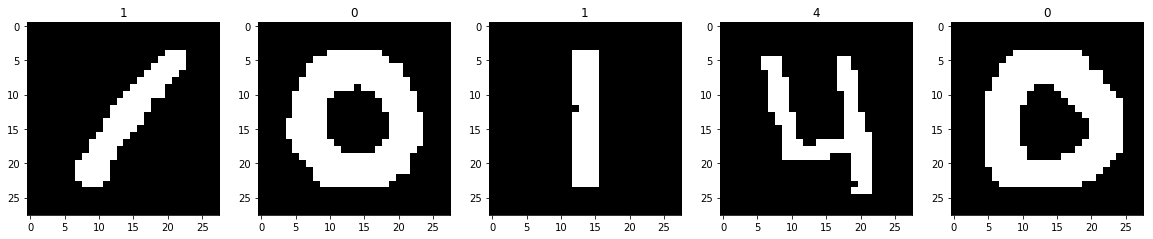

In [14]:
plt.figure(figsize=(20, 5))
for i in range(0, 5):
    images_bw = np.reshape(images[i], (28, 28))
    plt.subplot(1, 5, i+1)
    plt.imshow(images_bw, cmap=plt.cm.gray)
    plt.title(labels[i])

看圖片似乎改成純黑和白兩色的效果會比較好

* 先用 SVM 跑看看，並算分數
* 再用 logistic regression 跑，並算分數

因為 images 的元素被修改過了，要重新分 train 和 split

In [15]:
Xbw_train, Xbw_test, ybw_train, ybw_test = train_test_split(images, labels, test_size=0.2, random_state=42)

### SVM model

In [16]:
clf.fit(Xbw_train, ybw_train)
clf.score(Xbw_test, ybw_test)

/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.91

### Logistic regression

In [17]:
lr.fit(Xbw_train, ybw_train)
lr.score(Xbw_test, ybw_test)

/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.876

改成純黑白兩色之後，SVM 的分數從 11.7% 上升到 91%，logistic regression 的分數從 79 % 上升到 87.6%

## Confusion matrix

畫一下 confusion matrrix 來看 classification model 的 performance

In [18]:
from sklearn import metrics

ybw_pred = clf.predict(Xbw_test)
cm = metrics.confusion_matrix(ybw_test, ybw_pred)
print(cm)

[[ 95   0   0   0   0   1   3   0   0   1]
 [  0 116   0   0   0   0   1   0   0   0]
 [  0   2  99   0   0   0   2   2   1   0]
 [  2   0   3  92   0   4   2   1   1   0]
 [  0   0   1   0  79   0   0   1   0  10]
 [  2   3   2   2   2  77   1   0   2   0]
 [  2   1   0   0   1   1  89   0   1   0]
 [  0   1   1   0   0   0   0  95   0   7]
 [  0   2   0   3   1   1   0   0  91   3]
 [  1   2   1   0   2   0   0   6   1  77]]


用 seaborn 把 confusion matrix 畫出來

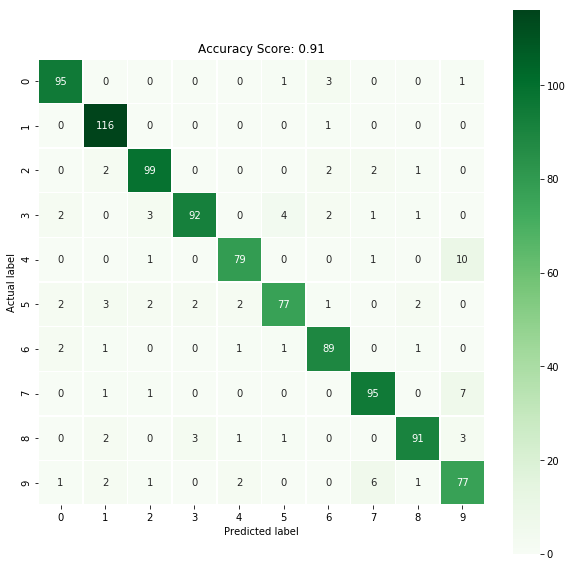

In [19]:
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', linewidths=.5, square=True, cmap='Greens')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
title = 'Accuracy Score: {0}'.format(clf.score(Xbw_test, ybw_test))
plt.title(title)
plt.show()

## Results

In [20]:
df_unlabeled = pd.read_csv('test.csv')
df_unlabeled.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
df_unlabeled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


改成存粹黑白兩色

In [22]:
df_unlabeled[df_unlabeled > 0] = 1
df_unlabeled.iloc[0].values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,

純黑白的時候 SVM 的效果比 logistic regression 還要好，就用 SVM 來預測結果

In [23]:
pred = clf.predict(df_unlabeled.values)

In [24]:
print(pred)

[2 0 9 ... 3 9 2]


### Save results

把結果存到 DataFrame

In [25]:
df_pred = pd.DataFrame(pred)
df_pred.index.name = 'ImageId'
df_pred.index += 1
df_pred.columns = ['Label']
df_pred.head()

,Label
ImageId,
1,2
2,0
3,9
4,9
5,2


輸出成 csv

In [26]:
df_pred.to_csv('MNIST_results.csv', header=True)